In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading credit data
cdata = pd.read_csv('Credit Bureau data.csv')
cdata.head(10)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0
5,312196805,0,0,0,0,0,0,10.0,0.0,0,0,0,0,0,0.0,2569.0,1,0,0.0
6,532217204,0,0,0,0,0,0,11.0,0.0,1,0,0,0,0,1.0,3005535.0,4,0,0.0
7,74788849,0,0,0,0,0,0,13.0,1.0,1,0,0,0,0,1.0,3004790.0,3,0,0.0
8,782743811,0,0,0,0,0,1,9.0,0.0,0,0,0,0,0,1.0,3007428.0,2,0,0.0
9,96964957,0,0,0,0,0,0,6.0,1.0,1,0,0,0,0,0.0,170860.0,1,1,0.0


In [3]:
#loading demographic data
ddata = pd.read_csv('Demographic data.csv')
ddata.head(10)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0
5,312196805,20,M,Married,1.0,39.0,Bachelor,SAL,NaN,116,52,0.0
6,532217204,42,M,Married,2.0,55.0,Professional,SAL,Rented,104,41,0.0
7,74788849,34,M,Married,2.0,49.0,Masters,SE_PROF,Rented,108,40,0.0
8,782743811,30,M,Married,3.0,48.0,Phd,SAL,Rented,115,58,0.0
9,96964957,22,M,Single,1.0,38.0,Bachelor,SE_PROF,Rented,111,57,0.0


In [4]:
#Fucntion to perform standard checks for a dataframe
def check_basic(df):
    print("Shape of the Data frame:")
    print(df.shape)
    print("\n")
    print("Basic info of the Data frame:")
    print(df.info())
    print("\n")
    print("Null percentages:")
    print(round(df.isnull().sum()/len(df)*100,2).astype(str)+' %')
    print("\n")
    print("Describe with percentiles:")
    describe=df.describe(percentiles=[.25, .5, .75, .90, .95, .99])
    display(HTML(describe.to_html()))

In [5]:
#merging both data
data = pd.merge(cdata,ddata,on='Application ID')

In [6]:
#basic check of data
check_basic(data)

Shape of the Data frame:
(71301, 30)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71301 entries, 0 to 71300
Data columns (total 30 columns):
Application ID                                                     71301 non-null int64
No of times 90 DPD or worse in last 6 months                       71301 non-null int64
No of times 60 DPD or worse in last 6 months                       71301 non-null int64
No of times 30 DPD or worse in last 6 months                       71301 non-null int64
No of times 90 DPD or worse in last 12 months                      71301 non-null int64
No of times 60 DPD or worse in last 12 months                      71301 non-null int64
No of times 30 DPD or worse in last 12 months                      71301 non-null int64
Avgas CC Utilization in last 12 months                             70243 non-null float64
No of trades opened in last 6 months                               71300 non-null float64
No of trades opened in las

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_x,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag_y
count,7.130100e+04,71301.000000,71301.000000,71301.000000,71301.000000,71301.000000,71301.000000,70243.000000,71300.000000,71301.000000,71301.000000,71301.000000,71301.000000,71301.000000,71029.000000,7.102900e+04,71301.000000,71301.000000,69876.000000,71301.000000,71298.000000,71301.000000,71301.000000,71301.000000,69876.000000
mean,4.989767e+08,0.270319,0.430555,0.577243,0.450358,0.655517,0.800957,29.698504,2.297980,5.826721,1.206841,2.397414,1.763510,3.535210,0.256402,1.249092e+06,8.186379,0.084627,0.042203,44.942694,2.865256,27.194450,34.564985,33.958780,0.042203
std,2.885844e+08,0.534161,0.825330,1.074450,0.808402,1.089532,1.331953,29.534724,2.070136,5.064964,1.352902,2.420039,1.971232,3.582094,0.436650,1.278846e+06,7.090555,0.278328,0.201054,9.939530,1.382308,15.514663,36.760727,20.411457,0.201054
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483824e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115220e+05,3.000000,0.000000,0.000000,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975977e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749850e+05,6.000000,0.000000,0.000000,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.496040e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920753e+06,10.000000,0.000000,0.000000,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
90%,8.994641e+08,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,73.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.275806e+06,20.000000,0.000000,0.000000,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.492920e+08,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,103.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.645888e+06,25.000000,1.000000,0.000000,62.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895329e+08,2.000000,3.000000,5.000000,3.000000,5.000000,6.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.249691e+06,31.000000,1.000000,1.000000,65.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [7]:
#Removing space from column names
ddata.columns = ddata.columns.str.replace(' ','')
cdata.columns = cdata.columns.str.replace(' ','')
data.columns = data.columns.str.replace(' ','')

In [8]:
#basic check for demographic data
check_basic(ddata)

Shape of the Data frame:
(71295, 12)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
ApplicationID                            71295 non-null int64
Age                                      71295 non-null int64
Gender                                   71293 non-null object
MaritalStatus(atthetimeofapplication)    71289 non-null object
Noofdependents                           71292 non-null float64
Income                                   71295 non-null float64
Education                                71176 non-null object
Profession                               71281 non-null object
Typeofresidence                          71287 non-null object
Noofmonthsincurrentresidence             71295 non-null int64
Noofmonthsincurrentcompany               71295 non-null int64
PerformanceTag                           69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB
None


,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
90%,8.994646e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.492921e+08,62.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895336e+08,65.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [9]:
#demographic data cleaning - removing rows for which performance tag is null since its labelled column
demodata = ddata.dropna(axis=0, subset=['PerformanceTag'])


In [10]:
#check basic after dropping nulls in performance tag
check_basic(demodata)

Shape of the Data frame:
(69870, 12)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 12 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69752 non-null object
Profession                               69857 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB
None


,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.995578,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.930036,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,62.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,65.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [11]:
#eda on age 
demodata[demodata['Age']<15].shape


(20, 12)

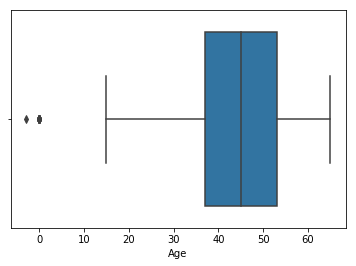

In [12]:
#boxplot for age
sns.boxplot(x=demodata['Age'])

In [13]:
#replace age less than 15 with 16 and age greater than 60 with 60
demodata['Age'] = np.where(demodata['Age']<15,16,demodata['Age'])
demodata['Age'] = np.where(demodata['Age']>60,60,demodata['Age'])

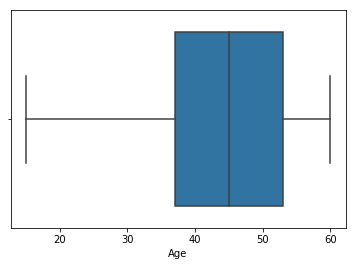

In [14]:
#boxplot after handling age
sns.boxplot(x=demodata['Age'])

In [15]:
#dividing age into buckets
demodata['AgeSegment'] = np.where(((demodata['Age'] >=16) & (demodata['Age'] <= 25)), 'Youth', 
                                       np.where(((demodata['Age'] >=26) & (demodata['Age'] <= 35)), 'MiddleAge', 
                                               np.where(((demodata['Age'] >=36) & (demodata['Age'] <= 50)), 'PostMiddleAge', 'Retired')))

In [16]:
#basic check
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69752 non-null object
Profession                               69857 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [17]:
#Handling education
demodata['Education'].unique()

array(['Bachelor', 'Professional', 'Masters', 'Phd', 'Others', nan],
      dtype=object)

In [18]:
#Education unique values count
demodata.Education.value_counts()

Professional    24386
Masters         23481
Bachelor        17302
Phd              4464
Others            119
Name: Education, dtype: int64

In [19]:
#filling null values in education with professional
demodata['Education'].fillna(value='Professional',inplace=True)

In [20]:
#basic check
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69870 non-null object
Profession                               69857 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [21]:
#handling null values for profession
demodata['Profession'].value_counts()

SAL        39674
SE_PROF    16256
SE         13927
Name: Profession, dtype: int64

In [22]:
#filling null values in profession with sal
demodata['Profession'].fillna(value='SAL', inplace=True)

In [23]:
#basic check
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69870 non-null object
Profession                               69870 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [24]:
#Marital status
demodata['MaritalStatus(atthetimeofapplication)'].value_counts()

Married    59547
Single     10317
Name: MaritalStatus(atthetimeofapplication), dtype: int64

In [25]:
#filling null values in marital status with Married
demodata['MaritalStatus(atthetimeofapplication)'].fillna(value='Married', inplace=True)

In [26]:
#Handling null value sin type of residence
demodata['Typeofresidence'].value_counts()

Rented                 52280
Owned                  14003
Living with Parents     1778
Company provided        1603
Others                   198
Name: Typeofresidence, dtype: int64

In [27]:
#Filling null in typeof residence with rented 
demodata['Typeofresidence'].fillna(value='Rented', inplace=True)

In [28]:
#Check basic
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69870 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69870 non-null object
Profession                               69870 non-null object
Typeofresidence                          69870 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


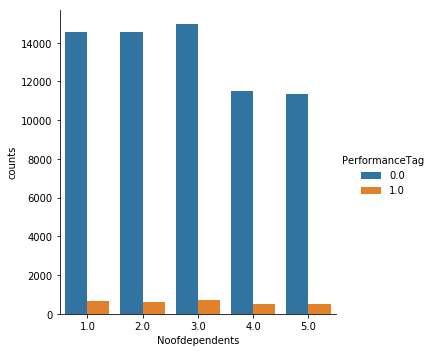

In [29]:
#ploting
#Plotting Noofdependents purpose against count 
grpby_Noofdependents = demodata.groupby(['Noofdependents','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Noofdependents', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Noofdependents)

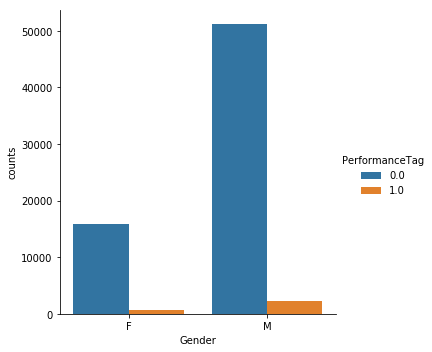

In [30]:
#Plotting Noofdependents purpose against count 
grpby_Gender = demodata.groupby(['Gender','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Gender', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Gender)

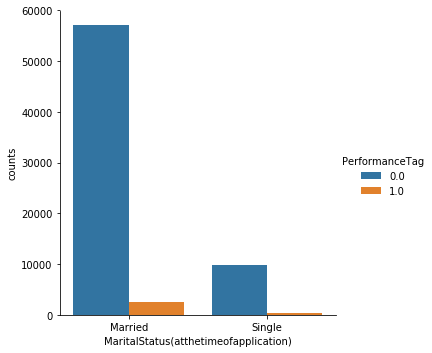

In [31]:
#Plotting Noofdependents purpose against count 
grpby_MaritalStatus = demodata.groupby(['MaritalStatus(atthetimeofapplication)','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'MaritalStatus(atthetimeofapplication)', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_MaritalStatus)

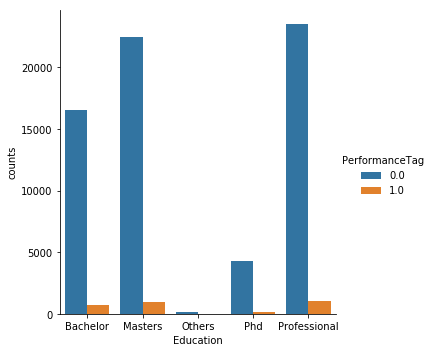

In [32]:
#Plotting Noofdependents purpose against count 
grpby_Education = demodata.groupby(['Education','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Education', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Education)

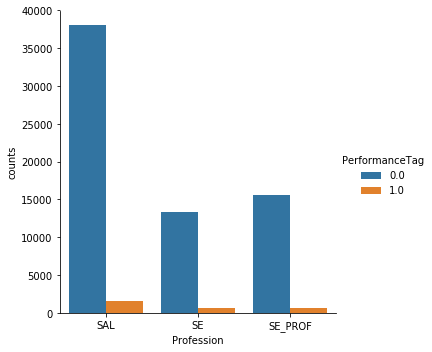

In [33]:
#Plotting Noofdependents purpose against count 
grpby_Profession = demodata.groupby(['Profession','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Profession', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Profession)

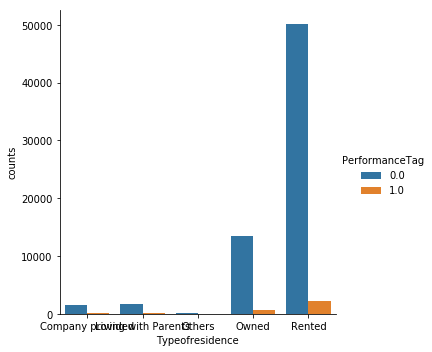

In [34]:
#Plotting Noofdependents purpose against count 
grpby_Typeofresidence = demodata.groupby(['Typeofresidence','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Typeofresidence', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Typeofresidence)

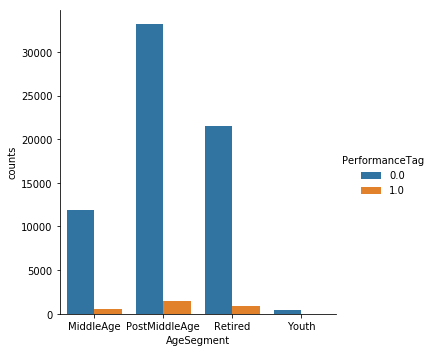

In [35]:
#Plotting Noofdependents purpose against count 
grpby_AgeSegment = demodata.groupby(['AgeSegment','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'AgeSegment', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_AgeSegment)

In [36]:
demodata.columns

Index(['ApplicationID', 'Age', 'Gender', 'MaritalStatus(atthetimeofapplication)', 'Noofdependents', 'Income', 'Education', 'Profession', 'Typeofresidence', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'PerformanceTag', 'AgeSegment'], dtype='object')

In [37]:
#Numeric variables
demodata_num = demodata[['Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany']]
demodata_num.corr()

,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany
Age,1.000000,0.169886,0.064425,-0.069262,-0.025241
Noofdependents,0.169886,1.000000,0.027497,-0.005277,-0.006451
Income,0.064425,0.027497,1.000000,-0.093479,-0.097561
Noofmonthsincurrentresidence,-0.069262,-0.005277,-0.093479,1.000000,-0.075198
Noofmonthsincurrentcompany,-0.025241,-0.006451,-0.097561,-0.075198,1.000000


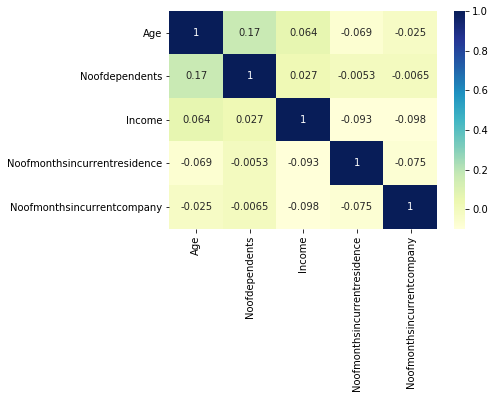

In [38]:
#correlation between various numeric values
sns.heatmap(demodata_num.corr(), cmap="YlGnBu", annot=True)
plt.show()

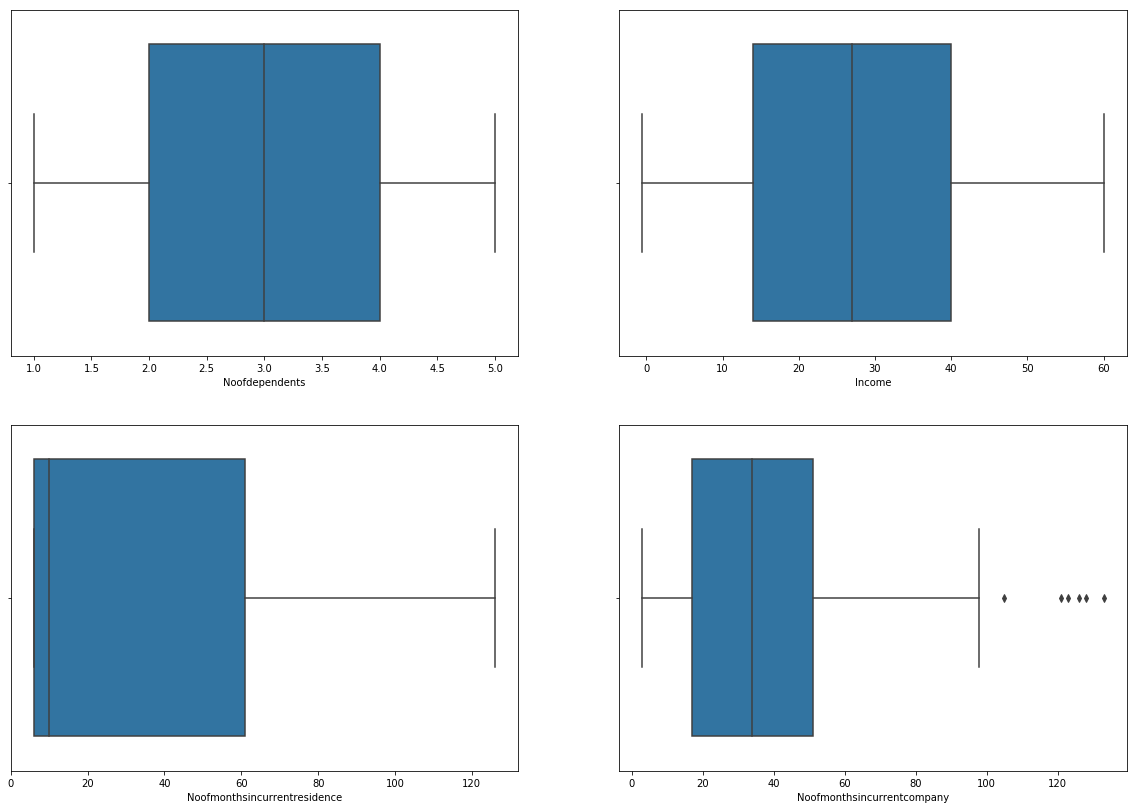

In [39]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=demodata['Noofdependents'])
plt.subplot(2,2,2)
sns.boxplot(x=demodata['Income'])
plt.subplot(2,2,3)
sns.boxplot(x=demodata['Noofmonthsincurrentresidence'])
plt.subplot(2,2,4)
sns.boxplot(x=demodata['Noofmonthsincurrentcompany'])
plt.show()


In [40]:
#Noofmonthsincurrentcompany has some outliers handling that
demodata['Noofmonthsincurrentcompany'] = np.where(demodata['Noofmonthsincurrentcompany']>100,100,demodata['Noofmonthsincurrentcompany'])

In [41]:
#handling income values less than zero and zero
IncomeMean = demodata['Income'].mean()
demodata['Income'] = np.where(demodata['Income']<1,IncomeMean,demodata['Income'])

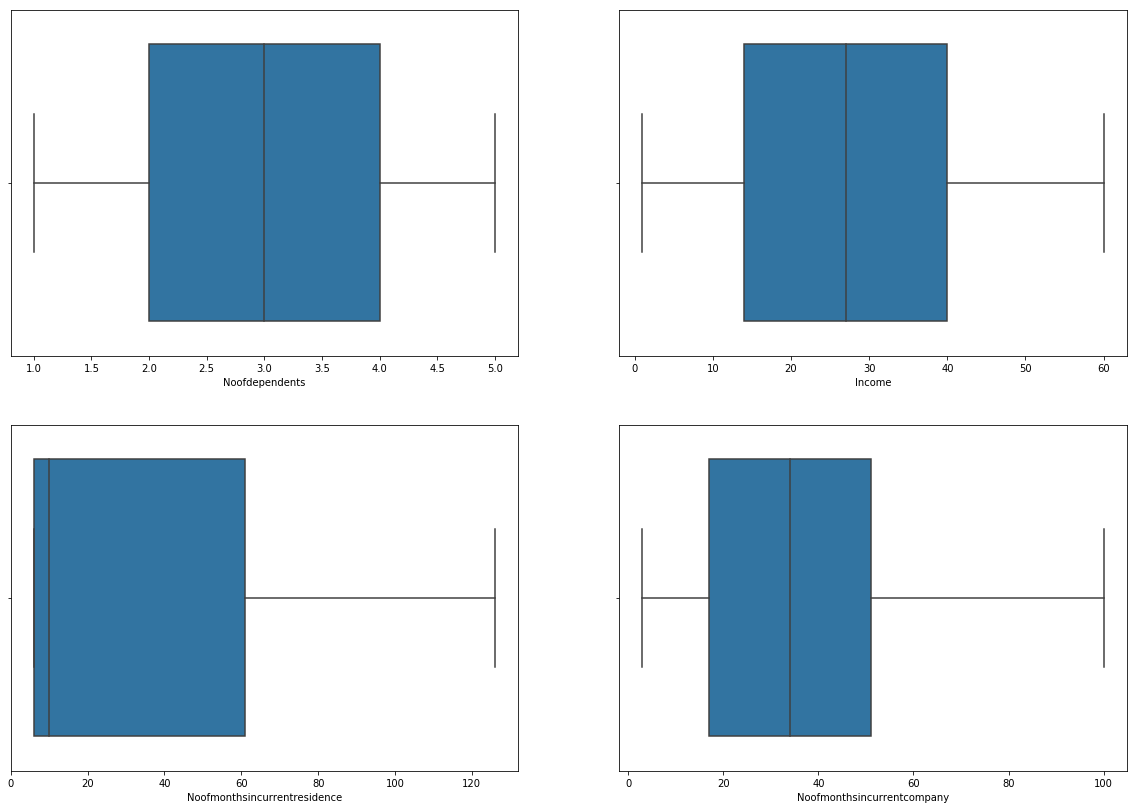

In [42]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=demodata['Noofdependents'])
plt.subplot(2,2,2)
sns.boxplot(x=demodata['Income'])
plt.subplot(2,2,3)
sns.boxplot(x=demodata['Noofmonthsincurrentresidence'])
plt.subplot(2,2,4)
sns.boxplot(x=demodata['Noofmonthsincurrentcompany'])
plt.show()

In [43]:
#cutting Noofmonthsincurrentresidence into bins
demodata['NoofmonthsincurrentresidenceBins'] = pd.cut(demodata['Noofmonthsincurrentresidence'],5)
demodata['NoofmonthsincurrentcompanyBins'] = pd.cut(demodata['Noofmonthsincurrentcompany'],5)

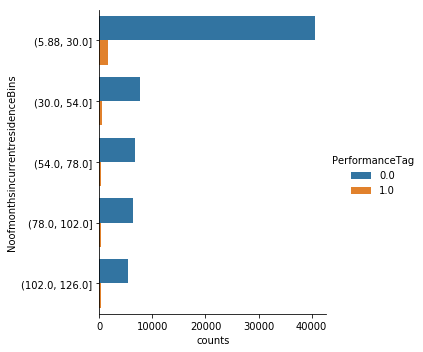

In [44]:
#Plotting Noofdependents purpose against count 
grpby_NoofmonthsincurrentresidenceBins = demodata.groupby(['NoofmonthsincurrentresidenceBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(y= 'NoofmonthsincurrentresidenceBins', x='counts', hue = 'PerformanceTag', kind="bar", data=grpby_NoofmonthsincurrentresidenceBins)

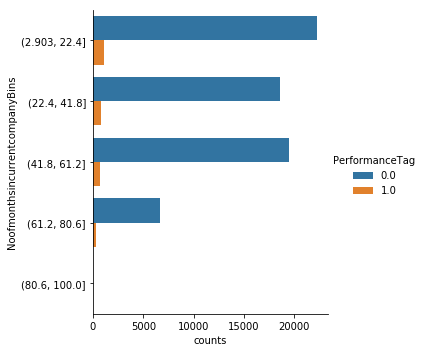

In [45]:
#Plotting Noofdependents purpose against count 
grpby_NoofmonthsincurrentcompanyBins = demodata.groupby(['NoofmonthsincurrentcompanyBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(y= 'NoofmonthsincurrentcompanyBins', x='counts', hue = 'PerformanceTag', kind="bar", data=grpby_NoofmonthsincurrentcompanyBins)

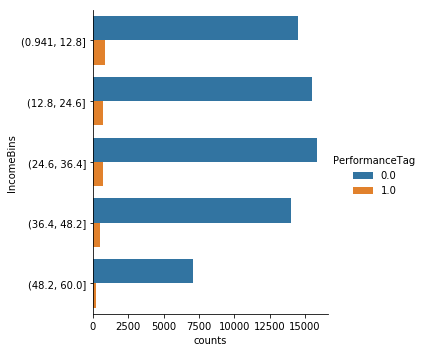

In [46]:
#cutting Noofmonthsincurrentresidence into bins
demodata['IncomeBins'] = pd.cut(demodata['Income'],5)
#Plotting Noofdependents purpose against count 
grpby_IncomeBins = demodata.groupby(['IncomeBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(y= 'IncomeBins', x='counts', hue = 'PerformanceTag', kind="bar", data=grpby_IncomeBins)

In [47]:
#det columns
demodata.columns

Index(['ApplicationID', 'Age', 'Gender', 'MaritalStatus(atthetimeofapplication)', 'Noofdependents', 'Income', 'Education', 'Profession', 'Typeofresidence', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'PerformanceTag', 'AgeSegment', 'NoofmonthsincurrentresidenceBins', 'NoofmonthsincurrentcompanyBins', 'IncomeBins'], dtype='object')

In [48]:
#get duplicates from categorical data columns
cols_dup = ['Gender', 'MaritalStatus(atthetimeofapplication)', 'Education', 'Profession', 'Typeofresidence', 'AgeSegment', 'NoofmonthsincurrentresidenceBins', 'NoofmonthsincurrentcompanyBins', 'IncomeBins']

demodata_clean = pd.get_dummies(data=demodata, columns=cols_dup,drop_first=True)
    

In [49]:
#Demodata after cleaning
demodata_clean.head(10)

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
0,954457215,48,2.0,40.0,113,56,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,432830445,31,4.0,55.0,112,46,0.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,941387308,32,2.0,46.0,104,49,0.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,392161677,43,1.0,53.0,94,53,0.0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,182011211,35,5.0,44.0,112,43,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
5,312196805,20,1.0,39.0,116,52,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
6,532217204,42,2.0,55.0,104,41,0.0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
7,74788849,34,2.0,49.0,108,40,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
8,782743811,30,3.0,48.0,115,58,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,96964957,22,1.0,38.0,111,57,0.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [50]:
#basic check after buidling model
check_basic(demodata_clean)

Shape of the Data frame:
(69870, 34)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 34 columns):
ApplicationID                                      69870 non-null int64
Age                                                69870 non-null int64
Noofdependents                                     69867 non-null float64
Income                                             69870 non-null float64
Noofmonthsincurrentresidence                       69870 non-null int64
Noofmonthsincurrentcompany                         69870 non-null int64
PerformanceTag                                     69870 non-null float64
Gender_M                                           69870 non-null uint8
MaritalStatus(atthetimeofapplication)_Single       69870 non-null uint8
Education_Masters                                  69870 non-null uint8
Education_Others                                   69870 non-null uint8
Education_Phd           

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.00000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.451005,34.608144,34.197238,0.042193,0.763733,0.147660,0.336067,0.001703,0.063890,0.350708,0.199327,0.232661,0.025447,0.002834,0.200415,0.748361,0.495706,0.320195,0.005839,0.116631,0.100358,0.095406,0.081580,0.276571,0.288636,0.100515,0.000143,0.23206,0.236339,0.207628,0.104752
std,2.885519e+08,9.557157,1.385554,15.437692,36.845655,20.342683,0.201030,0.424791,0.354765,0.472365,0.041235,0.244559,0.477195,0.399497,0.422531,0.157480,0.053159,0.400314,0.433958,0.499985,0.466555,0.076193,0.320982,0.300479,0.293777,0.273726,0.447306,0.453132,0.300688,0.011963,0.42215,0.424836,0.405612,0.306235
min,1.004500e+05,15.000000,1.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000,1.000000,1.000000,1.0000

In [51]:
#data retained after cleaning 
print("data retained after cleaning demographic data : "+str(demodata_clean.shape[0]/ddata.shape[0]))

data retained after cleaning demographic data : 0.9800126236061435


In [52]:
#perform eda on credit bureau data
check_basic(cdata)

Shape of the Data frame:
(71295, 19)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
ApplicationID                                           71295 non-null int64
Nooftimes90DPDorworseinlast6months                      71295 non-null int64
Nooftimes60DPDorworseinlast6months                      71295 non-null int64
Nooftimes30DPDorworseinlast6months                      71295 non-null int64
Nooftimes90DPDorworseinlast12months                     71295 non-null int64
Nooftimes60DPDorworseinlast12months                     71295 non-null int64
Nooftimes30DPDorworseinlast12months                     71295 non-null int64
AvgasCCUtilizationinlast12months                        70237 non-null float64
Nooftradesopenedinlast6months                           71294 non-null float64
Nooftradesopenedinlast12months                          71295 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
90%,8.994646e+08,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,73.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.275863e+06,20.000000,0.000000,0.000000
95%,9.492921e+08,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,103.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.645896e+06,25.000000,1.000000,0.000000
99%,9.895336e+08,2.000000,3.000000,5.000000,3.000000,5.000000,6.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.249692e+06,31.000000,1.000000,1.000000


In [53]:
#Droping rows with performance tag is null
creditdata = cdata.dropna(axis=0,subset=['PerformanceTag'])

In [54]:
#basic check 
check_basic(creditdata)

Shape of the Data frame:
(69870, 19)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 19 columns):
ApplicationID                                           69870 non-null int64
Nooftimes90DPDorworseinlast6months                      69870 non-null int64
Nooftimes60DPDorworseinlast6months                      69870 non-null int64
Nooftimes30DPDorworseinlast6months                      69870 non-null int64
Nooftimes90DPDorworseinlast12months                     69870 non-null int64
Nooftimes60DPDorworseinlast12months                     69870 non-null int64
Nooftimes30DPDorworseinlast12months                     69870 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           69869 non-null float64
Nooftradesopenedinlast12months                          69870 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag
count,6.987000e+04,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,68847.000000,69869.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69598.000000,6.959800e+04,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,0.248977,0.391685,0.523515,0.414842,0.603406,0.733906,29.265211,2.285105,5.784943,1.189566,2.363461,1.757979,3.525032,0.259648,1.253338e+06,8.174696,0.084872,0.042193
std,2.885519e+08,0.505658,0.771879,1.000757,0.763518,1.021757,1.243183,29.515749,2.081863,5.095342,1.352669,2.423629,1.985014,3.611696,0.438445,1.286166e+06,7.152798,0.278693,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.485780e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.083912e+05,3.000000,0.000000,0.000000
50%,4.980487e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,4.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.742345e+05,6.000000,0.000000,0.000000
75%,7.498645e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.926224e+06,10.000000,0.000000,0.000000
90%,8.995357e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.282343e+06,20.000000,0.000000,0.000000
95%,9.494121e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,104.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.650667e+06,25.000000,1.000000,0.000000
99%,9.895896e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.250985e+06,31.000000,1.000000,1.000000


In [55]:
#dropping rows with AvgasCCUtilizationinlast12months null
creditdata.dropna(axis=0,subset=['AvgasCCUtilizationinlast12months'],inplace=True)

In [56]:
#basic check
check_basic(creditdata)

Shape of the Data frame:
(68847, 19)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 19 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,29.265211,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,8.292504,0.086133,0.042122
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,29.515749,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,7.137571,0.280562,0.200870
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.289847e+06,20.000000,0.000000,0.000000
95%,9.494981e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,104.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.653379e+06,25.000000,1.000000,0.000000
99%,9.896704e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.251365e+06,31.000000,1.000000,1.000000


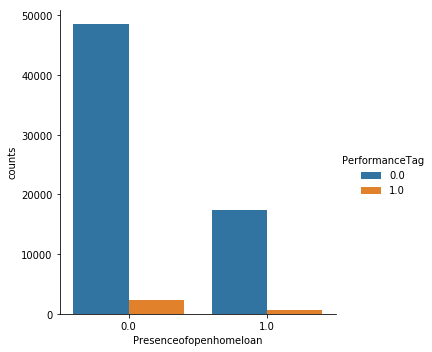

In [57]:

#Plotting Noofdependents purpose against count 
grpby_Presenceofopenhomeloan = creditdata.groupby(['Presenceofopenhomeloan','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Presenceofopenhomeloan', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Presenceofopenhomeloan)

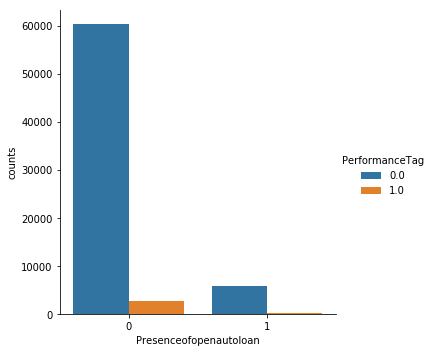

In [58]:

#Plotting Noofdependents purpose against count 
grpby_Presenceofopenautoloan = creditdata.groupby(['Presenceofopenautoloan','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Presenceofopenautoloan', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Presenceofopenautoloan)

In [59]:
#credit columns
creditdata.columns

Index(['ApplicationID', 'Nooftimes90DPDorworseinlast6months', 'Nooftimes60DPDorworseinlast6months', 'Nooftimes30DPDorworseinlast6months', 'Nooftimes90DPDorworseinlast12months', 'Nooftimes60DPDorworseinlast12months', 'Nooftimes30DPDorworseinlast12months', 'AvgasCCUtilizationinlast12months', 'Nooftradesopenedinlast6months', 'Nooftradesopenedinlast12months', 'NoofPLtradesopenedinlast6months', 'NoofPLtradesopenedinlast12months', 'NoofInquiriesinlast6months(excludinghome&autoloans)', 'NoofInquiriesinlast12months(excludinghome&autoloans)', 'Presenceofopenhomeloan', 'OutstandingBalance', 'TotalNoofTrades', 'Presenceofopenautoloan', 'PerformanceTag'], dtype='object')

In [60]:
#noof trades fraction
creditdata['FractionOftradesbyTT'] = (creditdata['Nooftradesopenedinlast6months'] + creditdata['Nooftradesopenedinlast12months'])/creditdata['TotalNoofTrades']

In [61]:
#no of pl trades opened fraction
creditdata['FractionOfPLtradesbyTT'] = (creditdata['NoofPLtradesopenedinlast6months'] + creditdata['NoofPLtradesopenedinlast12months'])/creditdata['TotalNoofTrades']

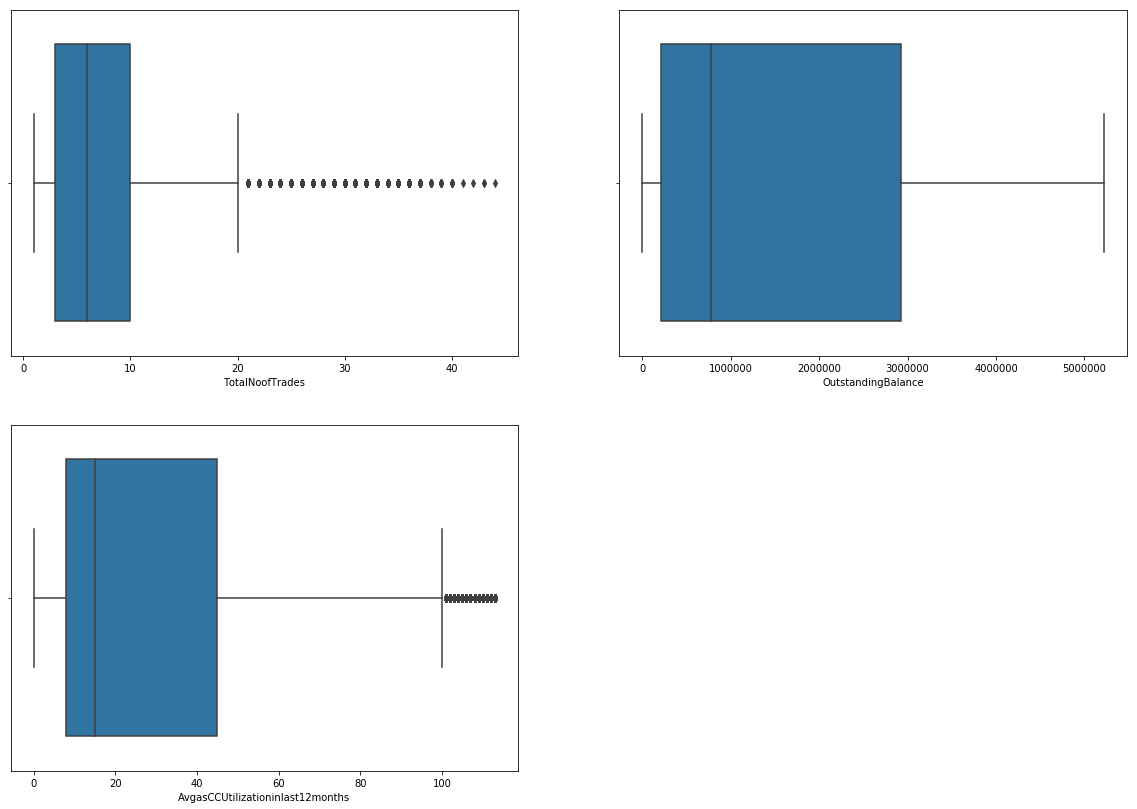

In [62]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=creditdata['TotalNoofTrades'])
plt.subplot(2,2,2)
sns.boxplot(x=creditdata['OutstandingBalance'])
plt.subplot(2,2,3)
sns.boxplot(x=creditdata['AvgasCCUtilizationinlast12months'])
plt.show()

In [63]:
#Handling outliers in TotalNoofTrades & AvgasCCUtilizationinlast12months
creditdata['TotalNoofTrades'] = np.where(creditdata['TotalNoofTrades']>20,20,creditdata['TotalNoofTrades'])
creditdata['AvgasCCUtilizationinlast12months'] = np.where(creditdata['AvgasCCUtilizationinlast12months']>100,100,creditdata['AvgasCCUtilizationinlast12months'])

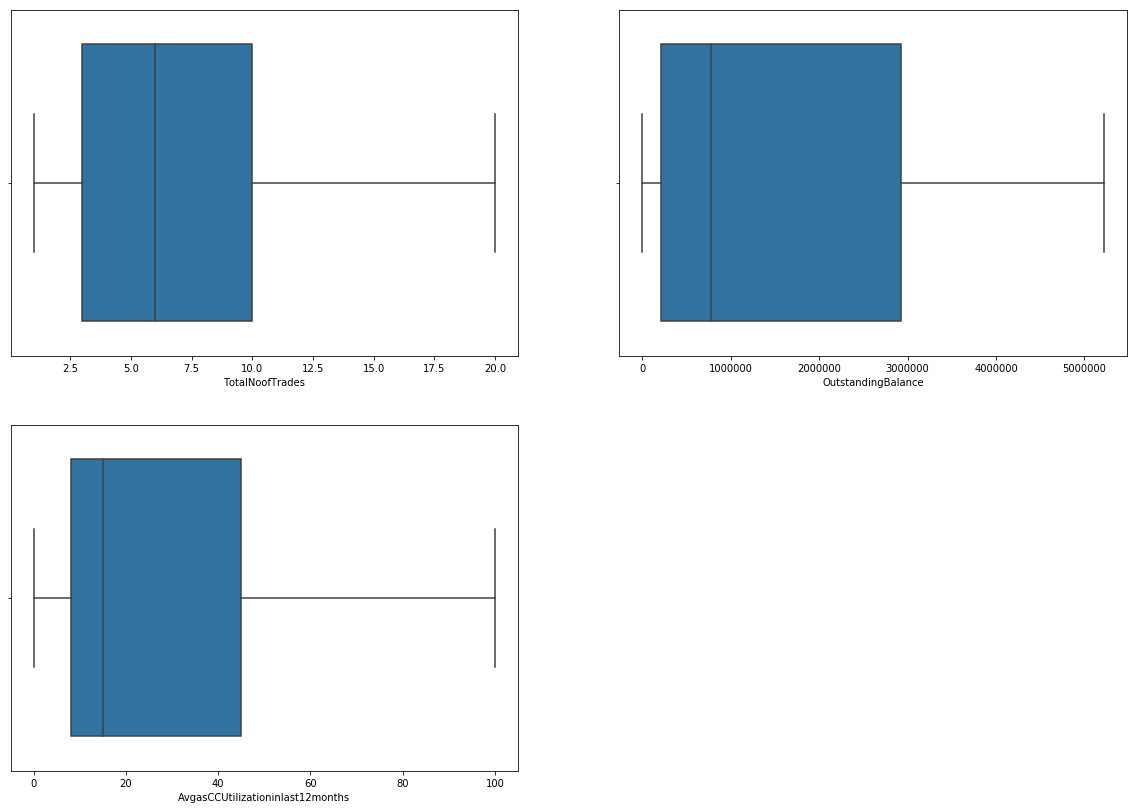

In [64]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=creditdata['TotalNoofTrades'])
plt.subplot(2,2,2)
sns.boxplot(x=creditdata['OutstandingBalance'])
plt.subplot(2,2,3)
sns.boxplot(x=creditdata['AvgasCCUtilizationinlast12months'])
plt.show()

In [65]:
#basic check
check_basic(creditdata)

Shape of the Data frame:
(68847, 21)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 21 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,28.629294,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,7.696080,0.086133,0.042122,0.930064,0.345476
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,27.798587,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,5.623384,0.280562,0.200870,0.385356,0.302405
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000,0.722222,0.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000,1.000000,0.368421
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000,1.200000,0.615385
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.289847e+06,20.000000,0.000000,0.000000,1.333333,0.750000
95%,9.494981e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,100.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.653379e+06,20.000000,1.000000,0.000000,1.428571,0.800000
99%,9.896704e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,100.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.251365e+06,20.000000,1.000000,1.000000,1.750000,0.909091


In [66]:
#deriving number of dpd in last 6 and 12 months
creditdata['TotalDPDinlast6months'] = creditdata['Nooftimes30DPDorworseinlast6months'] + creditdata['Nooftimes60DPDorworseinlast6months'] + creditdata['Nooftimes90DPDorworseinlast6months']
creditdata['TotalDPDinlast12months'] = creditdata['Nooftimes30DPDorworseinlast12months'] + creditdata['Nooftimes60DPDorworseinlast12months'] + creditdata['Nooftimes90DPDorworseinlast12months']
creditdata['TotalTradesopenedinlast6months'] = creditdata['Nooftradesopenedinlast6months'] + creditdata['NoofPLtradesopenedinlast6months']
creditdata['TotalTradesopenedinlast12months'] = creditdata['Nooftradesopenedinlast12months'] + creditdata['NoofPLtradesopenedinlast12months']

In [67]:
check_basic(creditdata)

Shape of the Data frame:
(68847, 25)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 25 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,28.629294,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,7.696080,0.086133,0.042122,0.930064,0.345476,1.178076,1.770854,3.523814,8.263091
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,27.798587,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,5.623384,0.280562,0.200870,0.385356,0.302405,2.213789,2.878826,3.330655,7.397558
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000,0.722222,0.000000,0.000000,0.000000,1.000000,2.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000,1.000000,0.368421,0.000000,0.000000,3.000000,6.000000
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000,1.200000,0.615385,2.000000,3.000000,5.000000,13.000000
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.289847e+06,20.000000,0.000000,0.000000,1.333333,0.750000,4.000000,6.000000,8.000000,19.000000
95%,9.494981e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,100.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.653379e+06,20.000000,1.000000,0.000000,1.428571,0.800000,6.000000,8.000000,10.000000,23.000000
99%,9.896704e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,100.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.251365e+06,20.000000,1.000000,1.000000,1.750000,0.909091,9.000000,12.000000,13.000000,29.000000


In [68]:
#creating bins
creditdata['TotalDPDinlast6monthsBins'] = pd.cut(creditdata['TotalDPDinlast6months'],3)
creditdata['TotalDPDinlast12monthsBins'] = pd.cut(creditdata['TotalDPDinlast12months'],5)
creditdata['TotalTradesopenedinlast6monthsBins'] = pd.cut(creditdata['TotalTradesopenedinlast6months'],3)
creditdata['TotalTradesopenedinlast12monthsBins'] = pd.cut(creditdata['TotalTradesopenedinlast12months'],5)


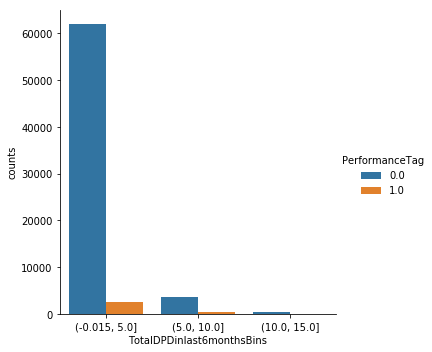

In [69]:
#plotting after creating bins

grpby_TotalDPDinlast6monthsBins = creditdata.groupby(['TotalDPDinlast6monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalDPDinlast6monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalDPDinlast6monthsBins)


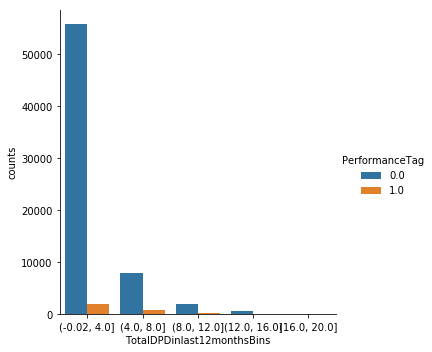

In [70]:
grpby_TotalDPDinlast12monthsBins = creditdata.groupby(['TotalDPDinlast12monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalDPDinlast12monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalDPDinlast12monthsBins)



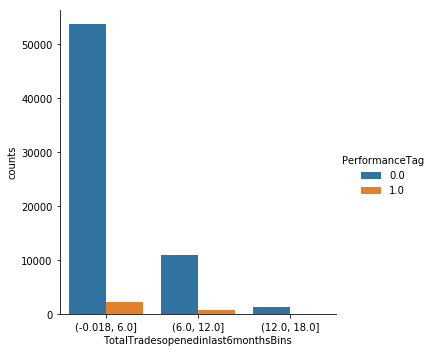

In [71]:
grpby_TotalTradesopenedinlast6monthsBins = creditdata.groupby(['TotalTradesopenedinlast6monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalTradesopenedinlast6monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalTradesopenedinlast6monthsBins)



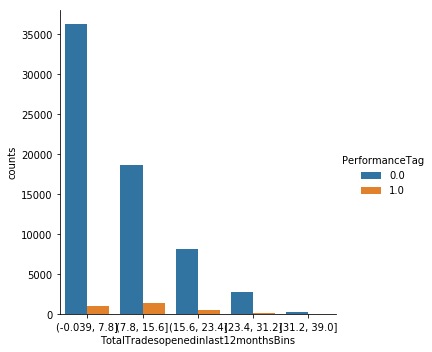

In [72]:
grpby_TotalTradesopenedinlast12monthsBins = creditdata.groupby(['TotalTradesopenedinlast12monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalTradesopenedinlast12monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalTradesopenedinlast12monthsBins)


In [73]:
creditdata.columns

Index(['ApplicationID', 'Nooftimes90DPDorworseinlast6months', 'Nooftimes60DPDorworseinlast6months', 'Nooftimes30DPDorworseinlast6months', 'Nooftimes90DPDorworseinlast12months', 'Nooftimes60DPDorworseinlast12months', 'Nooftimes30DPDorworseinlast12months', 'AvgasCCUtilizationinlast12months', 'Nooftradesopenedinlast6months', 'Nooftradesopenedinlast12months', 'NoofPLtradesopenedinlast6months', 'NoofPLtradesopenedinlast12months', 'NoofInquiriesinlast6months(excludinghome&autoloans)', 'NoofInquiriesinlast12months(excludinghome&autoloans)', 'Presenceofopenhomeloan', 'OutstandingBalance', 'TotalNoofTrades', 'Presenceofopenautoloan', 'PerformanceTag', 'FractionOftradesbyTT', 'FractionOfPLtradesbyTT', 'TotalDPDinlast6months', 'TotalDPDinlast12months', 'TotalTradesopenedinlast6months', 'TotalTradesopenedinlast12months', 'TotalDPDinlast6monthsBins', 'TotalDPDinlast12monthsBins', 'TotalTradesopenedinlast6monthsBins', 'TotalTradesopenedinlast12monthsBins'], dtype='object')

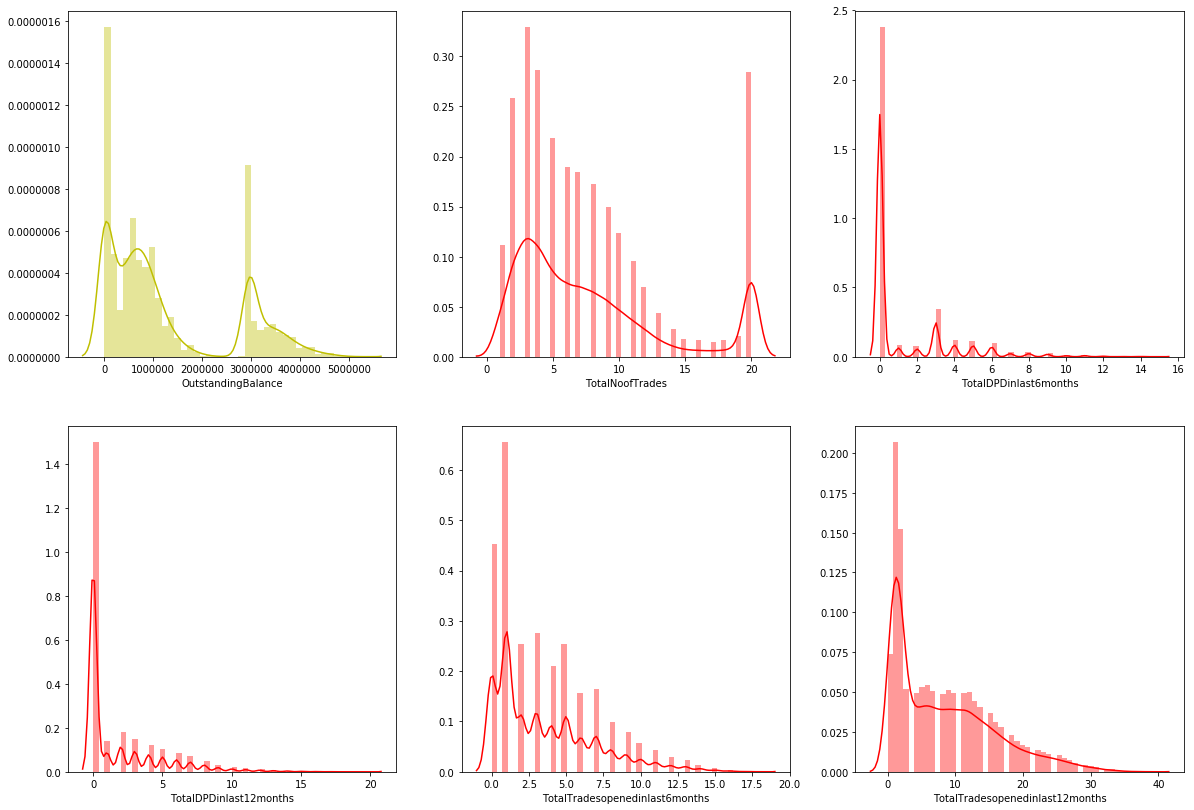

In [74]:
#SCatter plot for 
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.distplot(creditdata['OutstandingBalance'], color="y")
plt.subplot(2,3,2)
sns.distplot(creditdata['TotalNoofTrades'], color="r")
plt.subplot(2,3,3)
sns.distplot(creditdata['TotalDPDinlast6months'], color="r")
plt.subplot(2,3,4)
sns.distplot(creditdata['TotalDPDinlast12months'], color="r")
plt.subplot(2,3,5)
sns.distplot(creditdata['TotalTradesopenedinlast6months'], color="r")
plt.subplot(2,3,6)
sns.distplot(creditdata['TotalTradesopenedinlast12months'], color="r")
plt.show()


In [75]:
# Looking at the two inputfiles separately.
#1) Credit bureau file. identify records whose avg credit card utilisation is blank and all other fields are 0s. 
#These represent records with no hit in credit bureau
#Creating a new field: to represnt no hit/ no other credit card from Credit bureau data
#0 - default value
#1 - no hit
#2 - no other credit card


    
def f (nintyDPD6,sixtyDPD6,thirtyDPD6,nintyDPD12,sixtyDPD12,thirtyDPD12,CCutil,tr6,tr12,PLtr6,PLtr12,inq6,
      inq12,openhomeloan,OutBal,TotTrades,openautoloan):

    if (np.isnan(CCutil)) :
        if (nintyDPD6 == 0 and sixtyDPD6 == 0 and thirtyDPD6 == 0 and
            nintyDPD12 == 0 and sixtyDPD12 == 0 and thirtyDPD12 == 0 
            and tr6 == 0 and tr12 == 0 and 
            PLtr6 == 0 and PLtr12 == 0 and inq6 == 0 and inq12 == 0 and 
            openhomeloan == 0 and OutBal == 0 and 
            TotTrades == 0 and openautoloan == 0):
        
           return 1 
        else:
            return 2
    else:
        return 0

#x = f(0,0,0,0,0,0,float('nan'),0,0,0,0,0,0,0,0,0,0)       
        
creditdata['hit_flag'] = creditdata.apply(lambda row:f(row['Nooftimes90DPDorworseinlast6months'],row['Nooftimes60DPDorworseinlast6months'], row['Nooftimes30DPDorworseinlast6months'],
                                                           row['Nooftimes90DPDorworseinlast12months'], row['Nooftimes60DPDorworseinlast12months'], row['Nooftimes30DPDorworseinlast12months'],
                                                           row['AvgasCCUtilizationinlast12months'], row['Nooftradesopenedinlast6months'], row['Nooftradesopenedinlast12months'],
                                                           row['NoofPLtradesopenedinlast6months'], row['NoofPLtradesopenedinlast12months'], row['NoofInquiriesinlast6months(excludinghome&autoloans)'],
                                                           row['NoofInquiriesinlast12months(excludinghome&autoloans)'], row['Presenceofopenhomeloan'], row['OutstandingBalance'],
                                                           row['TotalNoofTrades'], row['Presenceofopenautoloan']),axis=1)
                                                          
                                            
    
creditdata.head()



,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,TotalDPDinlast6monthsBins,TotalDPDinlast12monthsBins,TotalTradesopenedinlast6monthsBins,TotalTradesopenedinlast12monthsBins,hit_flag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0,0.75,0.0,0,0,1.0,2,"(-0.015, 5.0]","(-0.02, 4.0]","(-0.018, 6.0]","(-0.039, 7.8]",0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0,0.60,0.0,0,0,1.0,2,"(-0.015, 5.0]","(-0.02, 4.0]","(-0.018, 6.0]","(-0.039, 7.8]",0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0,0.00,0.0,0,0,0.0,0,"(-0.015, 5.0]","(-0.02, 4.0]","(-0.018, 6.0]","(-0.039, 7.8]",0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0,0.50,0.0,0,0,1.0,1,"(-0.015, 5.0]","(-0.02, 4.0]","(-0.018, 6.0]","(-0.039, 7.8]",0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0,0.25,0.0,0,0,0.0,1,"(-0.015, 5.0]","(-0.02, 4.0]","(-0.018, 6.0]","(-0.039, 7.8]",0


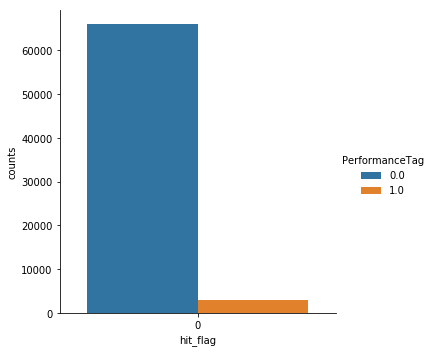

In [76]:
#hit flag
grpby_TotalTradesopenedinlast12monthsBins = creditdata.groupby(['hit_flag','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'hit_flag', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalTradesopenedinlast12monthsBins)


In [77]:
#get duplicates from categorical data columns
credit_cols_dup = ['TotalDPDinlast6monthsBins', 'TotalDPDinlast12monthsBins', 'TotalTradesopenedinlast6monthsBins', 'TotalTradesopenedinlast12monthsBins']

creditdata_clean = pd.get_dummies(data=creditdata, columns=credit_cols_dup,drop_first=True)
    

In [78]:
check_basic(creditdata_clean)

Shape of the Data frame:
(68847, 38)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 38 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,hit_flag,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]"
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.0,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,28.629294,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,7.696080,0.086133,0.042122,0.930064,0.345476,1.178076,1.770854,3.523814,8.263091,0.0,0.058957,0.005679,0.123186,0.031534,0.007248,0.000668,0.169637,0.018345,0.289395,0.124755,0.041861,0.003835
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,27.798587,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,5.623384,0.280562,0.200870,0.385356,0.302405,2.213789,2.878826,3.330655,7.397558,0.0,0.235546,0.075147,0.328653,0.174756,0.084826,0.025840,0.375316,0.134197,0.453485,0.330443,0.200273,0.061806
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000,0.722222,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000,1.000000,0.368421,0.000000,0.000000,3.000000,6.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000,1.200000,0.615385,2.000000,3.000000,5.000000,13.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.00000

In [79]:
#data retained after cleaning
print("data reatained after cleaning credit data: "+str(creditdata_clean.shape[0]/cdata.shape[0]))

data reatained after cleaning credit data: 0.9656637912897118


In [80]:
check_basic(demodata_clean)

Shape of the Data frame:
(69870, 34)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 34 columns):
ApplicationID                                      69870 non-null int64
Age                                                69870 non-null int64
Noofdependents                                     69867 non-null float64
Income                                             69870 non-null float64
Noofmonthsincurrentresidence                       69870 non-null int64
Noofmonthsincurrentcompany                         69870 non-null int64
PerformanceTag                                     69870 non-null float64
Gender_M                                           69870 non-null uint8
MaritalStatus(atthetimeofapplication)_Single       69870 non-null uint8
Education_Masters                                  69870 non-null uint8
Education_Others                                   69870 non-null uint8
Education_Phd           

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.00000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.451005,34.608144,34.197238,0.042193,0.763733,0.147660,0.336067,0.001703,0.063890,0.350708,0.199327,0.232661,0.025447,0.002834,0.200415,0.748361,0.495706,0.320195,0.005839,0.116631,0.100358,0.095406,0.081580,0.276571,0.288636,0.100515,0.000143,0.23206,0.236339,0.207628,0.104752
std,2.885519e+08,9.557157,1.385554,15.437692,36.845655,20.342683,0.201030,0.424791,0.354765,0.472365,0.041235,0.244559,0.477195,0.399497,0.422531,0.157480,0.053159,0.400314,0.433958,0.499985,0.466555,0.076193,0.320982,0.300479,0.293777,0.273726,0.447306,0.453132,0.300688,0.011963,0.42215,0.424836,0.405612,0.306235
min,1.004500e+05,15.000000,1.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000,1.000000,1.000000,1.0000

In [81]:
demodata_clean.columns

Index(['ApplicationID', 'Age', 'Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'PerformanceTag', 'Gender_M', 'MaritalStatus(atthetimeofapplication)_Single', 'Education_Masters', 'Education_Others', 'Education_Phd', 'Education_Professional', 'Profession_SE', 'Profession_SE_PROF', 'Typeofresidence_Living with Parents', 'Typeofresidence_Others', 'Typeofresidence_Owned', 'Typeofresidence_Rented', 'AgeSegment_PostMiddleAge', 'AgeSegment_Retired', 'AgeSegment_Youth', 'NoofmonthsincurrentresidenceBins_(30.0, 54.0]', 'NoofmonthsincurrentresidenceBins_(54.0, 78.0]', 'NoofmonthsincurrentresidenceBins_(78.0, 102.0]', 'NoofmonthsincurrentresidenceBins_(102.0, 126.0]', 'NoofmonthsincurrentcompanyBins_(22.4, 41.8]', 'NoofmonthsincurrentcompanyBins_(41.8, 61.2]', 'NoofmonthsincurrentcompanyBins_(61.2, 80.6]', 'NoofmonthsincurrentcompanyBins_(80.6, 100.0]', 'IncomeBins_(12.8, 24.6]', 'IncomeBins_(24.6, 36.4]', 'IncomeBins_(36.4, 48.2]',
       'IncomeBins_(48.

In [82]:
unitcols =  ['Gender_M', 'MaritalStatus(atthetimeofapplication)_Single', 'Education_Masters', 'Education_Others', 'Education_Phd', 'Education_Professional', 'Profession_SE', 'Profession_SE_PROF', 'Typeofresidence_Living with Parents', 'Typeofresidence_Others', 'Typeofresidence_Owned', 'Typeofresidence_Rented', 'AgeSegment_PostMiddleAge', 'AgeSegment_Retired', 'AgeSegment_Youth', 'NoofmonthsincurrentresidenceBins_(30.0, 54.0]', 'NoofmonthsincurrentresidenceBins_(54.0, 78.0]', 'NoofmonthsincurrentresidenceBins_(78.0, 102.0]', 'NoofmonthsincurrentresidenceBins_(102.0, 126.0]', 'NoofmonthsincurrentcompanyBins_(22.4, 41.8]', 'NoofmonthsincurrentcompanyBins_(41.8, 61.2]', 'NoofmonthsincurrentcompanyBins_(61.2, 80.6]', 'NoofmonthsincurrentcompanyBins_(80.6, 100.0]', 'IncomeBins_(12.8, 24.6]', 'IncomeBins_(24.6, 36.4]', 'IncomeBins_(36.4, 48.2]',
       'IncomeBins_(48.2, 60.0]']
for c in unitcols:
    demodata_clean[c] = demodata_clean[c].astype('float64',inplace=True)

In [83]:
check_basic(demodata_clean)

Shape of the Data frame:
(69870, 34)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 34 columns):
ApplicationID                                      69870 non-null int64
Age                                                69870 non-null int64
Noofdependents                                     69867 non-null float64
Income                                             69870 non-null float64
Noofmonthsincurrentresidence                       69870 non-null int64
Noofmonthsincurrentcompany                         69870 non-null int64
PerformanceTag                                     69870 non-null float64
Gender_M                                           69870 non-null float64
MaritalStatus(atthetimeofapplication)_Single       69870 non-null float64
Education_Masters                                  69870 non-null float64
Education_Others                                   69870 non-null float64
Education_Phd   

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.00000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.451005,34.608144,34.197238,0.042193,0.763733,0.147660,0.336067,0.001703,0.063890,0.350708,0.199327,0.232661,0.025447,0.002834,0.200415,0.748361,0.495706,0.320195,0.005839,0.116631,0.100358,0.095406,0.081580,0.276571,0.288636,0.100515,0.000143,0.23206,0.236339,0.207628,0.104752
std,2.885519e+08,9.557157,1.385554,15.437692,36.845655,20.342683,0.201030,0.424791,0.354765,0.472365,0.041235,0.244559,0.477195,0.399497,0.422531,0.157480,0.053159,0.400314,0.433958,0.499985,0.466555,0.076193,0.320982,0.300479,0.293777,0.273726,0.447306,0.453132,0.300688,0.011963,0.42215,0.424836,0.405612,0.306235
min,1.004500e+05,15.000000,1.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000,1.000000,1.000000,1.0000

In [84]:
#test train split building model demo graphic data
Y = demodata_clean.loc[:,'PerformanceTag']
X = demodata_clean.loc[:,demodata_clean.columns != 'PerformanceTag']
X.drop(['ApplicationID'], axis=1, inplace=True)
colsX = X.columns
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = colsX
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, 
                                                    random_state = 40)

In [85]:
check_basic(X_train)

Shape of the Data frame:
(48909, 32)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48909 entries, 29982 to 11590
Data columns (total 32 columns):
Age                                                48909 non-null float64
Noofdependents                                     48906 non-null float64
Income                                             48909 non-null float64
Noofmonthsincurrentresidence                       48909 non-null float64
Noofmonthsincurrentcompany                         48909 non-null float64
Gender_M                                           48909 non-null float64
MaritalStatus(atthetimeofapplication)_Single       48909 non-null float64
Education_Masters                                  48909 non-null float64
Education_Others                                   48909 non-null float64
Education_Phd                                      48909 non-null float64
Education_Professional                             48909 non-null float64
Prof

,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,48909.000000,48906.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000
mean,0.001569,0.002557,0.000568,-0.001265,0.004720,-0.000116,-0.001147,0.000316,-0.000149,0.001856,0.000523,0.004662,0.000426,0.000571,-0.004462,-0.000158,0.001621,0.002638,-0.000675,0.000644,-0.005370,0.006097,-0.002589,-0.001494,-0.003053,0.004742,0.003257,-0.001709,-0.000232,0.000910,0.001265,-0.001155
std,0.998130,1.001447,0.999421,0.999519,1.000233,1.000082,0.998870,1.000120,0.998211,1.003313,1.000174,1.003502,1.000280,1.001730,0.957362,0.999892,0.999081,1.000029,0.999750,1.004178,0.993561,1.008068,0.996435,0.997723,0.998479,1.002209,1.004323,0.925839,0.999863,1.000574,1.000921,0.998518
min,-3.117649,-1.342116,-1.713416,-0.776437,-1.533596,-1.797914,-0.416222,-0.711460,-0.041305,-0.261248,-0.734942,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,-1.724515,-0.991449,-0.686301,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,-0.618308,-0.636985,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
25%,-0.711058,-0.620378,-0.871316,-0.776437,-0.845383,0.556200,-0.416222,-0.711460,-0.041305,-0.261248,-0.734942,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,-1.724515,-0.991449,-0.686301,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,-0.618308,-0.636985,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
50%,0.021382,0.101360,-0.029215,-0.667876,-0.009696,0.556200,-0.416222,-0.711460,-0.041305,-0.261248,-0.734942,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,0.579873,-0.991449,-0.686301,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,-0.618308,-0.636985,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
75%,0.858457,0.823098,0.812886,0.716286,0.825991,0.556200,-0.416222,1.405559,-0.041305,-0.261248,1.360651,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,0.579873,1.008625,1.457086,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,1.617316,1.569895,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
90%,1.381629,1.544835,1.395879,1.720483,1.366730,0.556200,2.402565,1.405559,-0.041305,-0.261248,1.360651,2.004214,1.816069,-0.161591,-0.053309,1.997410,0.579873,1.008625,1.457086,-0.076640,2.752101,2.994052,-0.324758,-0.298038,1.617316,1.569895,2.991444,-0.011964,1.819131,1.797557,1.953534,2.923420
95%,1.590898,1.544835,1.719764,2.046168,1.661679,0.556200,2.402565,1.405559,-0.041305,3.827778,1.360651,2.004214,1.816069,-0.161591,-0.053309,1.997410,0.579873,1.008625,1.457086,-0.076640,2.752101,2.994052,3.079212,3.355279,1.617316,1.569895,2.991444,-0.011964,1.819131,1.797557,1.953534,2.923420
99%,1.590898,1.544835,2.043649,2.371853,1.956627,0.556200,2.402565,1.405559,-0.041305,3.827778,1.360651,2.004214,1.816069,6.188454,-0.053309,1.997410,0.579873,1.008625,1.457086,-0.076640,2.752101,2.994052,3.079212

In [86]:
X_train['Noofdependents'].fillna(X_train['Noofdependents'].mean(), inplace=True)

In [87]:
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

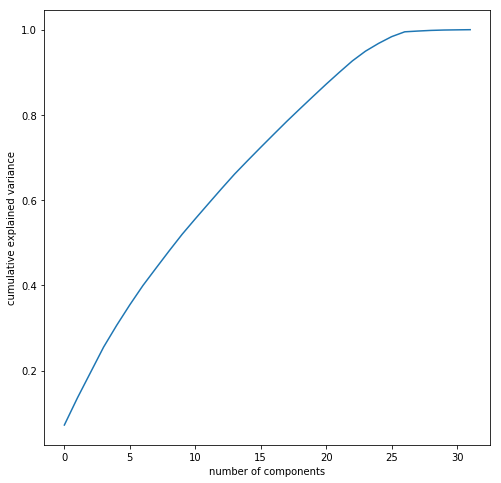

In [88]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [89]:
pca_final = IncrementalPCA(n_components=25)
df_train_pca = pca_final.fit_transform(X_train)

In [90]:
df_test_pca = pca_final.transform(X_test)

In [91]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [92]:
# Predicted probabilities
y_pred = model_pca.predict(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [93]:
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
print("Classification report")
print(classification_report(y_test, y_pred))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("precision_score : " + str(precision_score(y_test, y_pred)))
print("recall_score : " +str(recall_score(y_test, y_pred)))

Classification report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20073
         1.0       0.00      0.00      0.00       888

    accuracy                           0.96     20961
   macro avg       0.48      0.50      0.49     20961
weighted avg       0.92      0.96      0.94     20961

accuracy : 0.9576356089881208
precision_score : 0.0
recall_score : 0.0


In [94]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
# Predicted probabilities
y_pred = dt1.predict(df_test_pca)
print("Classification report")
print(classification_report(y_test, y_pred))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("precision_score : " + str(precision_score(y_test, y_pred)))
print("recall_score : " +str(recall_score(y_test, y_pred)))


Classification report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20073
         1.0       0.00      0.00      0.00       888

    accuracy                           0.96     20961
   macro avg       0.48      0.50      0.49     20961
weighted avg       0.92      0.96      0.94     20961

accuracy : 0.9571585325127618
precision_score : 0.0
recall_score : 0.0


In [96]:
#MAin data performance 
#Creating main data with demographic and credit data
demodata_clean = demodata_clean.drop('PerformanceTag',axis=1)
maindata = pd.merge(demodata_clean, creditdata_clean, on='ApplicationID')
maindata.head(10)

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]",Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,hit_flag,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]"
0,954457215,48,2.0,40.0,113,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0,0.750000,0.0,0,0,1.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,432830445,31,4.0,55.0,112,46,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0,0.600000,0.0,0,0,1.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,941387308,32,2.0,46.0,104,49,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0,0.000000,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,392161677,43,1.0,53.0,94,53,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0,0.500000,0.0,0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,182011211,35,5.0,44.0,112,43,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0,0.250000,0.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,312196805,20,1.0,39.0,116,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,10.0,0.0,0,0,0,0,0,0.0,2569.0,1,0,0.0,0.000000,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,532217204,42,2.0,55.0,104,41,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,11.0,0.0,1,0,0,0,0,1.0,3005535.0,4,0,0.0,0.250000,0.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,74788849,34,2.0,49.0,108,40,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [97]:
#test train split building model demo graphic data
Y = maindata.loc[:,'PerformanceTag']
X = maindata.loc[:,maindata.columns != 'PerformanceTag']
X.drop(['ApplicationID'], axis=1, inplace=True)
colsX = X.columns

X.columns = colsX
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, 
                                                    random_state = 40)

In [98]:
#value count
y_train.value_counts()

0.0    46152
1.0     2045
Name: PerformanceTag, dtype: int64

In [99]:
# Standardisation continuous features for X_train
X_train_df = X_train[['Age', 'Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'AvgasCCUtilizationinlast12months',  'OutstandingBalance', 'TotalNoofTrades']]
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()
X_train = X_train.drop(['Age', 'Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'AvgasCCUtilizationinlast12months',  'OutstandingBalance', 'TotalNoofTrades'], 1)
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [100]:
# Standardisation continuous features for X_train
X_test_df = X_test[['Age', 'Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'AvgasCCUtilizationinlast12months',  'OutstandingBalance', 'TotalNoofTrades']]
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()
X_test = X_test.drop(['Age', 'Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'AvgasCCUtilizationinlast12months',  'OutstandingBalance', 'TotalNoofTrades'], 1)
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [101]:
check_basic(X_train)

Shape of the Data frame:
(48197, 68)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48197 entries, 42018 to 11590
Data columns (total 68 columns):
Gender_M                                                48197 non-null float64
MaritalStatus(atthetimeofapplication)_Single            48197 non-null float64
Education_Masters                                       48197 non-null float64
Education_Others                                        48197 non-null float64
Education_Phd                                           48197 non-null float64
Education_Professional                                  48197 non-null float64
Profession_SE                                           48197 non-null float64
Profession_SE_PROF                                      48197 non-null float64
Typeofresidence_Living with Parents                     48197 non-null float64
Typeofresidence_Others                                  48197 non-null float64
Typeofresidence_Owned       

,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]",Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,Presenceofopenautoloan,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,hit_flag,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]",Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,AvgasCCUtilizationinlast12months,OutstandingBalance,TotalNoofTrades
count,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.00000,48197.000000,48197.000000,48197.000000,48197.0,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,4.819700e+04,4.819400e+04,4.819700e+04,4.819700e+04,4.819700e+04,4.819700e+04,4.819700e+04,4.819700e+04
mean,0.761749,0.148308,0.335643,0.001660,0.064797,0.352014,0.199120,0.230533,0.025562,0.002656,0.201154,0.747308,0.496462,0.320580,0.005747,0.117808,0.100359,0.094985,0.080959,0.277424,0.286408,0.101521,0.000207,0.231757,0.235222,0.207627,0.104799,0.250348,0.393385,0.524867,0.417287,0.606656,0.736560,2.314231,5.855925,1.204868,2.389070,1.781563,3.563189,0.264021,0.085773,0.927143,0.343727,1.16860,1.760504,3.519099,8.244995,0.0,0.058095,0.005457,0.123555,0.031226,0.007075,0.000560,0.169637,0.018487,0.287259,0.125195,0.041725,0.003901,9.765365e-16,-5.326284e-16,-1.176085e-15,2.895559e-16,1.279923e-16,-1.032249e-16,8.637935e-17,-1.530222e-17
std,0.426018,0.355409,0.472220,0.040708,0.246169,0.477603,0.399343,0.421178,0.157825,0.051466,0.400867,0.434560,0.499993,0.466704,0.075593,0.322384,0.300481,0.293197,0.272776,0.447732,0.452087,0.302020,0.014403,0.421959,0.424142,0.405612,0.306298,0.506316,0.771803,0.997064,0.762773,1.020222,1.238225,2.082516,5

In [102]:
X_train['Noofdependents'].fillna(X_train['Noofdependents'].mean(), inplace=True)

In [103]:
pca_credit_demo = PCA(svd_solver='randomized', random_state=42)

pca_credit_demo.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

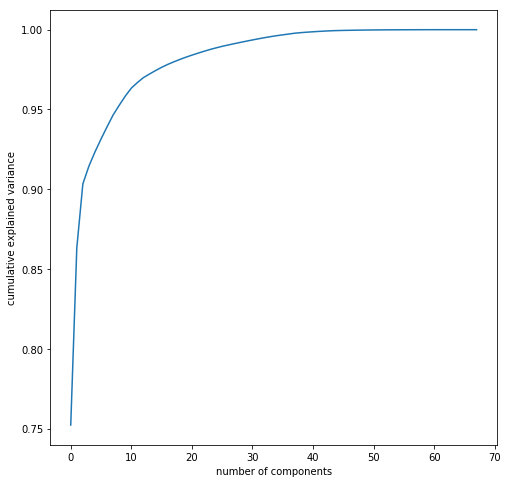

In [104]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca_credit_demo.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [105]:
pca_final = IncrementalPCA(n_components=20)
df_train_pca = pca_credit_demo.fit_transform(X_train)
df_test_pca = pca_credit_demo.transform(X_test)
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)
# Predicted probabilities
y_pred = model_pca.predict(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
print("results for main data credit+demo")
print("Classification report")
print(classification_report(y_test, y_pred))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("precision_score : " + str(precision_score(y_test, y_pred)))
print("recall_score : " +str(recall_score(y_test, y_pred)))

results for main data credit+demo
Classification report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     19800
         1.0       0.00      0.00      0.00       856

    accuracy                           0.96     20656
   macro avg       0.48      0.50      0.49     20656
weighted avg       0.92      0.96      0.94     20656

accuracy : 0.9585592563903951
precision_score : 0.0
recall_score : 0.0


In [106]:
#Confusion merix
print(str(confusion_matrix(y_test, y_pred)))

[[19800     0]
 [  856     0]]


In [107]:
#building stats model import statsmodels.api as sm
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(df_train_pca)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48197
Model:                            GLM   Df Residuals:                    48133
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8061.0
Date:                Sun, 15 Sep 2019   Deviance:                       16122.
Time:                        11:30:33   Pearson chi2:                 4.73e+04
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3136      0.375     -8.846      0.000      -4.048      -2.579
x1             0.0389      0.010      3.724      0.000       0.018       0.059
x2             0.0865      0.037      2.354      0.019       0.014       0.159
x3             0.0199      0.032      0.626      0.531      -0.042       0.082
x4            -0.0859      0.041     -2.100      0.036      -0.166      -0.006
x5             0.0553      0.081      0.679      0.497      -0.104       0.215
x6             0.1338      0.068      1.981      0.048       0.001       0.266
x7             0.0062      0.747      0.008      0.993      -1.459       1.471
x8            -0.0177      0.440     -0.040      0.968      -0.879       0.844
x9            -0.0161      0.026     -0.625      0.532      -0.067       0.034
x10           -0.0386      0.463     -0.083      0.933      -0.945       0.868
x11           -0.2033      0.178     -1.140      0.254      -0.553       0.146
x12            0.1064      0.041      2.598      0.009       0.026       0.187
x13           -0.0388      0.237     -0.164      0.870      -0.503       0.426
x14            0.0334      0.212      0.158      0.875      -0.382       0.448
x15            0.0039      0.042      0.092      0.927      -0.079       0.087
x16            0.0629      0.041      1.532      0.126      -0.018       0.143
x17           -0.0561      0.225     -0.250      0.803      -0.497       0.384
x18           -0.0271      0.760     -0.036      0.972      -1.517       1.463
x19            0.0747      0.062      1.201      0.230      -0.047       0.197
x20           -0.0964      0.128     -0.754      0.451      -0.347       0.154
x21           -0.0516      0.085     -0.609      0.542      -0.218       0.114
x22           -0.0649      0.368     -0.176      0.860      -0.787       0.657
x23            0.0482      0.143      0.337      0.736      -0.233       0.329
x24           -0.0530      0.309     -0.172      0.864      -0.658       0.552
x25           -0.0855      0.403     -0.212      0.832      -0.876       0.705
x26            0.0611      0.881      0.069      0.945      -1.665       1.787
x27            0.1474      0.370      0.399      0.690      -0.577       0.872
x28            0.0194      0.070      0.278      0.781      -0.117       0.156
x29           -0.0165      0.216     -0.076      0.939      -0.440       0.407
x30            0.1931      0.791      0.244      0.807      -1.357       1.743
x31           -0.0132      0.377     -0.035      0.972      -0.753       0.726
x32            0.0005      0.076      0.007      0.994      -0.148       0.149
x33            0.0353      0.334      0.106      0.916      -0.620       0.691
x34            0.0074      0.467      0.016      0.987      -0.907       0.922
x35           -0.1848      0.292     -0.633      0.527      -0.757       0.388
x36           -0.1661      0.445     -0.373      0.709      -1.039       0.707
x3

In [108]:
#Feature engineering using rfe 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender_M', False, 13),
 ('MaritalStatus(atthetimeofapplication)_Single', False, 15),
 ('Education_Masters', False, 19),
 ('Education_Others', True, 1),
 ('Education_Phd', False, 18),
 ('Education_Professional', False, 14),
 ('Profession_SE', False, 2),
 ('Profession_SE_PROF', False, 10),
 ('Typeofresidence_Living with Parents', True, 1),
 ('Typeofresidence_Others', True, 1),
 ('Typeofresidence_Owned', True, 1),
 ('Typeofresidence_Rented', True, 1),
 ('AgeSegment_PostMiddleAge', False, 24),
 ('AgeSegment_Retired', False, 11),
 ('AgeSegment_Youth', True, 1),
 ('NoofmonthsincurrentresidenceBins_(30.0, 54.0]', False, 21),
 ('NoofmonthsincurrentresidenceBins_(54.0, 78.0]', False, 20),
 ('NoofmonthsincurrentresidenceBins_(78.0, 102.0]', True, 1),
 ('NoofmonthsincurrentresidenceBins_(102.0, 126.0]', True, 1),
 ('NoofmonthsincurrentcompanyBins_(22.4, 41.8]', True, 1),
 ('NoofmonthsincurrentcompanyBins_(41.8, 61.2]', True, 1),
 ('NoofmonthsincurrentcompanyBins_(61.2, 80.6]', True, 1),
 ('Noo

In [109]:
#Using RFE supported columns
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48197
Model:                            GLM   Df Residuals:                    48166
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.6
Date:                Sun, 15 Sep 2019   Deviance:                       16157.
Time:                        11:31:04   Pearson chi2:                 4.72e+04
No. Iterations:                    21   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.3906      0.167    -20.325      0.000      -3.718      -3.064
Education_Others                                     0.8023      0.404      1.986      0.047       0.010       1.594
Typeofresidence_Living with Parents                 -0.2743      0.198     -1.389      0.165      -0.661       0.113
Typeofresidence_Others                              -0.4920      0.530     -0.928      0.354      -1.531       0.547
Typeofresidence_Owned                               -0.2119      0.147     -1.445      0.148      -0.499       0.075
Typeofresidence_Rented                              -0.2200      0.140     -1.571      0.116      -0.495       0.054
AgeSegment_Youth                                    -0.2821      0.508     -0.555      0.579      -1.278       0.713
NoofmonthsincurrentresidenceBins_(78.0, 102.0]       0.2919      0.111      2.632      0.008       0.075       0.509
NoofmonthsincurrentresidenceBins_(102.0, 126.0]      0.3113      0.141      2.215      0.027       0.036       0.587
NoofmonthsincurrentcompanyBins_(22.4, 41.8]         -0.0920      0.058     -1.587      0.113      -0.206       0.022
NoofmonthsincurrentcompanyBins_(41.8, 61.2]         -0.1058      0.060     -1.755      0.079      -0.224       0.012
NoofmonthsincurrentcompanyBins_(61.2, 80.6]         -0.0920      0.079     -1.158      0.247      -0.248       0.064
NoofmonthsincurrentcompanyBins_(80.6, 100.0]       -19.0495    1.5e+04     -0.001      0.999   -2.95e+04    2.94e+04
IncomeBins_(36.4, 48.2]                             -0.0957      0.063     -1.529      0.126      -0.218       0.027
IncomeBins_(48.2, 60.0]                             -0.1564      0.090     -1.744      0.081      -0.332       0.019
Nooftimes60DPDorworseinlast6months                  -0.2009      0.089     -2.246      0.025      -0.376      -0.026
Nooftimes30DPDorworseinlast6months                   0.1762      0.075      2.354      0.019       0.030       0.323
Nooftimes60DPDorworseinlast12months                 -0.1034      0.069     -1.507      0.132      -0.238       0.031
FractionOftradesbyTT                                -0.1679      0.100     -1.679      0.093      -0.364       0.028
FractionOfPLtradesbyTT                               1.1456      0.142      8.040      0.000       0.866       1.425
TotalDPDinlast12months                               0.1279      0.034      3.819      0.000       0.062       0.194
TotalDPDinlast6monthsBins_(5.0, 10.0]               -0.2154      0.110     -1.953      0.051      -0.432       0.001
TotalDPDinlast6monthsBins_(10.0, 15.0]              -0.1563      0.353     -0.443      0.658      -0.848       0.536
TotalDPDinlast12monthsBins_(12.0, 16.0]             -0.7362      0.293     -2.511      0.012      -1.311      -0.162
Tot

In [110]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Performer_actual':y_train.values, 'Performer_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Performer_Prob.map(lambda x: 1 if x > 0.5 else 0)
#Confusion merix 

print(str(confusion_matrix(y_train_pred_final['Performer_actual'], y_train_pred_final['predicted'])))
print("Accuracy "+str(print(str(accuracy_score(y_train_pred_final['Performer_actual'], y_train_pred_final['predicted'])))))
print("F1 Score "+str(print(str(metrics.f1_score(y_train_pred_final['Performer_actual'], y_train_pred_final['predicted'])))))

[[46152     0]
 [ 2045     0]]
0.9575699732348486
Accuracy None
0.0
F1 Score None


In [111]:
#distint count
pd.value_counts(pd.Series(y_test))

0.0    19800
1.0      856
Name: PerformanceTag, dtype: int64

In [112]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,class_weight="balanced",random_state=40, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train[col],y_train)

y_train_pred = clf.predict(X_train[col])

print('On train data- confusion metrix')
print(str(confusion_matrix(y_train, y_train_pred)))
print("Accuracy "+str(accuracy_score(y_train, y_train_pred)))
print("F1 Score "+str(metrics.f1_score(y_train, y_train_pred)))

y_pred=clf.predict(X_test[col])

print('On test data confusion metrix')
print(str(confusion_matrix(y_test, y_pred)))
print("Accuracy "+str(accuracy_score(y_test, y_pred)))
print("F1 Score "+str(metrics.f1_score(y_test, y_pred)))



On train data- confusion metrix
[[45731   421]
 [   45  2000]]
Accuracy 0.9903313484241758
F1 Score 0.8956560680698611
On test data confusion metrix
[[19600   200]
 [  856     0]]
Accuracy 0.9488768396591789
F1 Score 0.0


In [113]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,class_weight="balanced_subsample",random_state=40, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train[col],y_train)

y_train_pred = clf.predict(X_train[col])

print('On train data- confusion metrix')
print(str(confusion_matrix(y_train, y_train_pred)))
print("Accuracy "+str(accuracy_score(y_train, y_train_pred)))
print("F1 Score "+str(metrics.f1_score(y_train, y_train_pred)))

y_pred=clf.predict(X_test[col])

print('On test data confusion metrix')
print(str(confusion_matrix(y_test, y_pred)))
print("Accuracy "+str(accuracy_score(y_test, y_pred)))
print("F1 Score "+str(metrics.f1_score(y_test, y_pred)))



On train data- confusion metrix
[[45731   421]
 [   44  2001]]
Accuracy 0.9903520966035231
F1 Score 0.8959032907991941
On test data confusion metrix
[[19599   201]
 [  856     0]]
Accuracy 0.9488284275755229
F1 Score 0.0


In [114]:
#train
X_train_r = X_train[col]
X_test_r = X_test[col]

In [115]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(15, 40, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",random_state=40)


# fit tree on training data
gd_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1,verbose = 1,refit=True,return_train_score='warn')
gd_rf.fit(X_train_r, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',gd_rf.best_score_,'using',gd_rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.9s finished


We can get accuracy of 0.9484407743220532 using {'max_depth': 30}


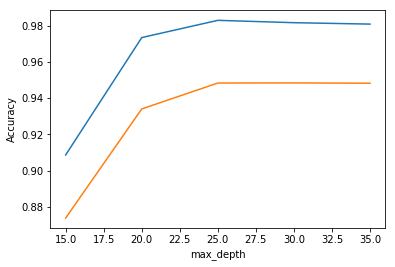

In [116]:
# scores of GridSearch CV
scores = gd_rf.cv_results_
# plotting accuracies with max_depth
plt.subplot(1,1,1)
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()


In [117]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [1,5,10,15, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",random_state=40)


# fit tree on training data
gd_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1,verbose = 1,refit=True,return_train_score='warn')
gd_rf.fit(X_train_r, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',gd_rf.best_score_,'using',gd_rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished


We can get accuracy of 0.9483785297840115 using {'max_features': 10}


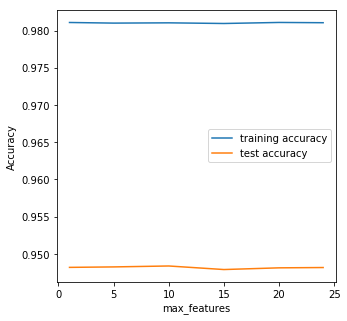

In [118]:
# scores of GridSearch CV
scores = gd_rf.cv_results_
# plotting accuracies with max_depth
plt.figure(figsize=(5, 5))
plt.subplot(1,1,1)
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [119]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1,40, 4)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",random_state=40)


# fit tree on training data
gd_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1,verbose = 1,refit=True,return_train_score='warn')
gd_rf.fit(X_train_r, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',gd_rf.best_score_,'using',gd_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.2s finished


We can get accuracy of 0.9482540407079278 using {'min_samples_leaf': 1}


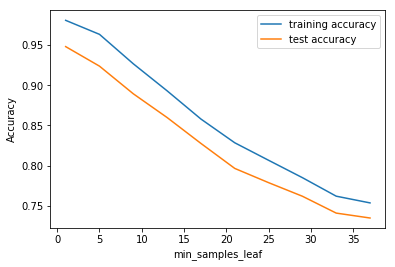

In [120]:
scores = gd_rf.cv_results_
plt.subplot(1,1,1)
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()

In [121]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 50, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",random_state=40)


# fit tree on training data
gd_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1,verbose = 1,refit=True,return_train_score='warn')
gd_rf.fit(X_train_r, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',gd_rf.best_score_,'using',gd_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.1s finished


We can get accuracy of 0.9482540407079278 using {'min_samples_split': 2}


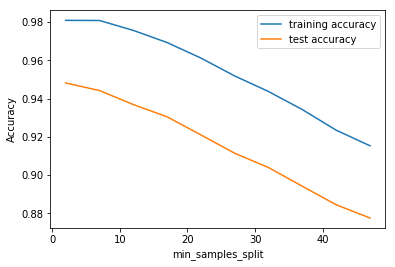

In [122]:
scores = gd_rf.cv_results_
plt.subplot(1,1,1)
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

In [123]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10, 100, 10)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",random_state=40)


# fit tree on training data
gd_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1,verbose = 1,refit=True,return_train_score='warn')
gd_rf.fit(X_train_r, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',gd_rf.best_score_,'using',gd_rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   31.5s finished


We can get accuracy of 0.9486275079361786 using {'n_estimators': 50}


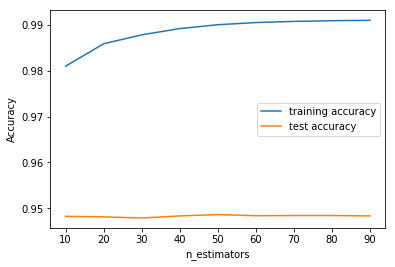

In [124]:
scores = gd_rf.cv_results_
plt.subplot(1,1,1)
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()

In [135]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': [24,26,28],
             'n_estimators': [50,52,54],
             'max_features': [2,4,6],
             'min_samples_leaf': [1,2,4],
             'min_samples_split': [2,4]}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",random_state=40)


# fit tree on training data
gd_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1,verbose = 1,refit=True,return_train_score='warn')
gd_rf.fit(X_train_r, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=40,
                                              verbose=0, warm_start=False),
            

In [136]:
print('We can get accuracy of',gd_rf.best_score_,'using',gd_rf.best_params_)

We can get accuracy of 0.9530261219577982 using {'max_depth': 28, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 54}


In [138]:
#RAndom forest final model
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=26,
                             min_samples_leaf=2, 
                             min_samples_split=2,
                             max_features=6,
                             n_estimators=52,class_weight="balanced",random_state=40,criterion='gini',
                            n_jobs=-1,warm_start=True)

rfc_final.fit(X_train_r, y_train)

y_train_pred = rfc_final.predict(X_train_r)

print('On train data- confusion metrix')
print(str(confusion_matrix(y_train, y_train_pred)))
print("Accuracy "+str(accuracy_score(y_train, y_train_pred)))
print("F1 Score "+str(metrics.f1_score(y_train, y_train_pred)))

y_pred=rfc_final.predict(X_test_r)

print('On test data confusion metrix')
print(str(confusion_matrix(y_test, y_pred)))
print("Accuracy "+str(accuracy_score(y_test, y_pred)))
print("F1 Score "+str(metrics.f1_score(y_test, y_pred)))

On train data- confusion metrix
[[45938   214]
 [  179  1866]]
Accuracy 0.9918459655165259
F1 Score 0.9047272727272728
On test data confusion metrix
[[19665   135]
 [  854     2]]
Accuracy 0.9521204492641363
F1 Score 0.004028197381671701
